In [59]:
import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import sklearn
from sklearn import preprocessing, datasets, metrics
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [60]:
cancer_data = pd.read_csv("breast-cancer.csv")
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
#Find null values
cancer_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [62]:
#drop unnamed column that has all missing values
cancer_data = cancer_data.dropna(axis=1)

In [63]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [64]:
#Find total of malignant and benign patients
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

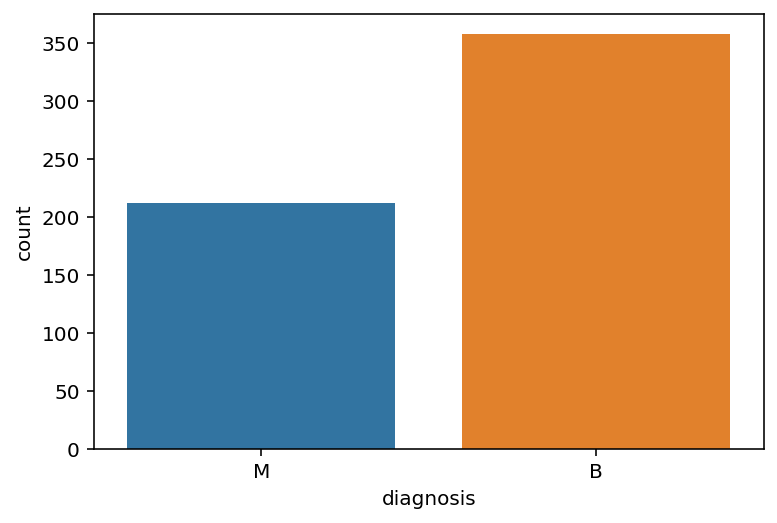

In [65]:
#Visualize the totals
sns.countplot(cancer_data['diagnosis'], label='count')

In [66]:
#Identify data types, to encode object types (Strings to integers)
cancer_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [67]:
#encode the diagnosis column to 1/0 from M/B
labelencoder_Y = preprocessing.LabelEncoder()
#encode the values of the second column
cancer_data.iloc[:,1] = labelencoder_Y.fit_transform(cancer_data.iloc[:,1].values)

In [68]:
cancer_data.dtypes

id                           int64
diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [69]:
#Remove unnecessary id column
cancer_data.drop("id", axis='columns', inplace=True)

In [70]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


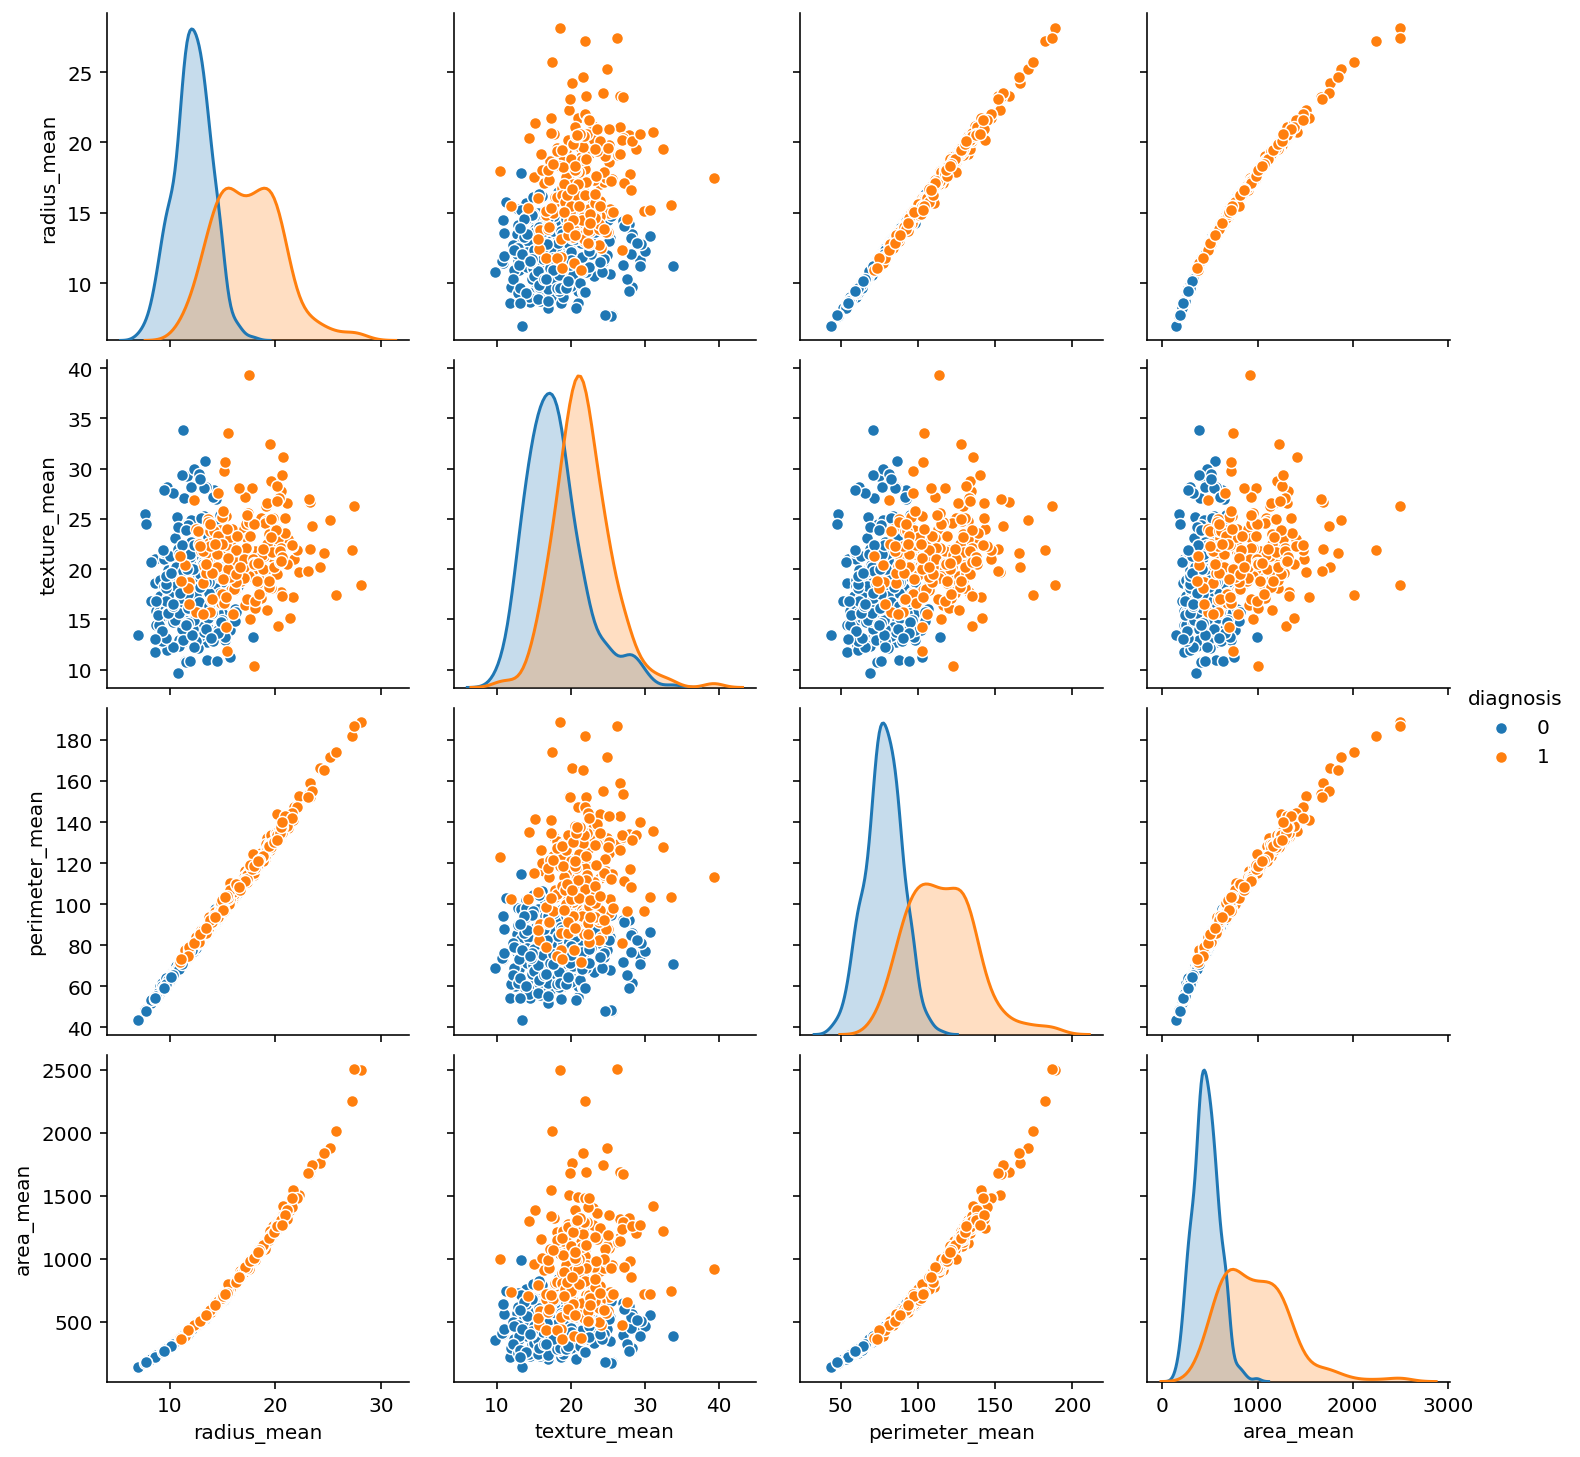

In [71]:
#Visualize diagnosis
sns.pairplot(cancer_data.iloc[:,0:5], hue='diagnosis')

In [72]:
#identifying correlations between data (whether a column affects another)
cancer_data.iloc[:,0:11].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

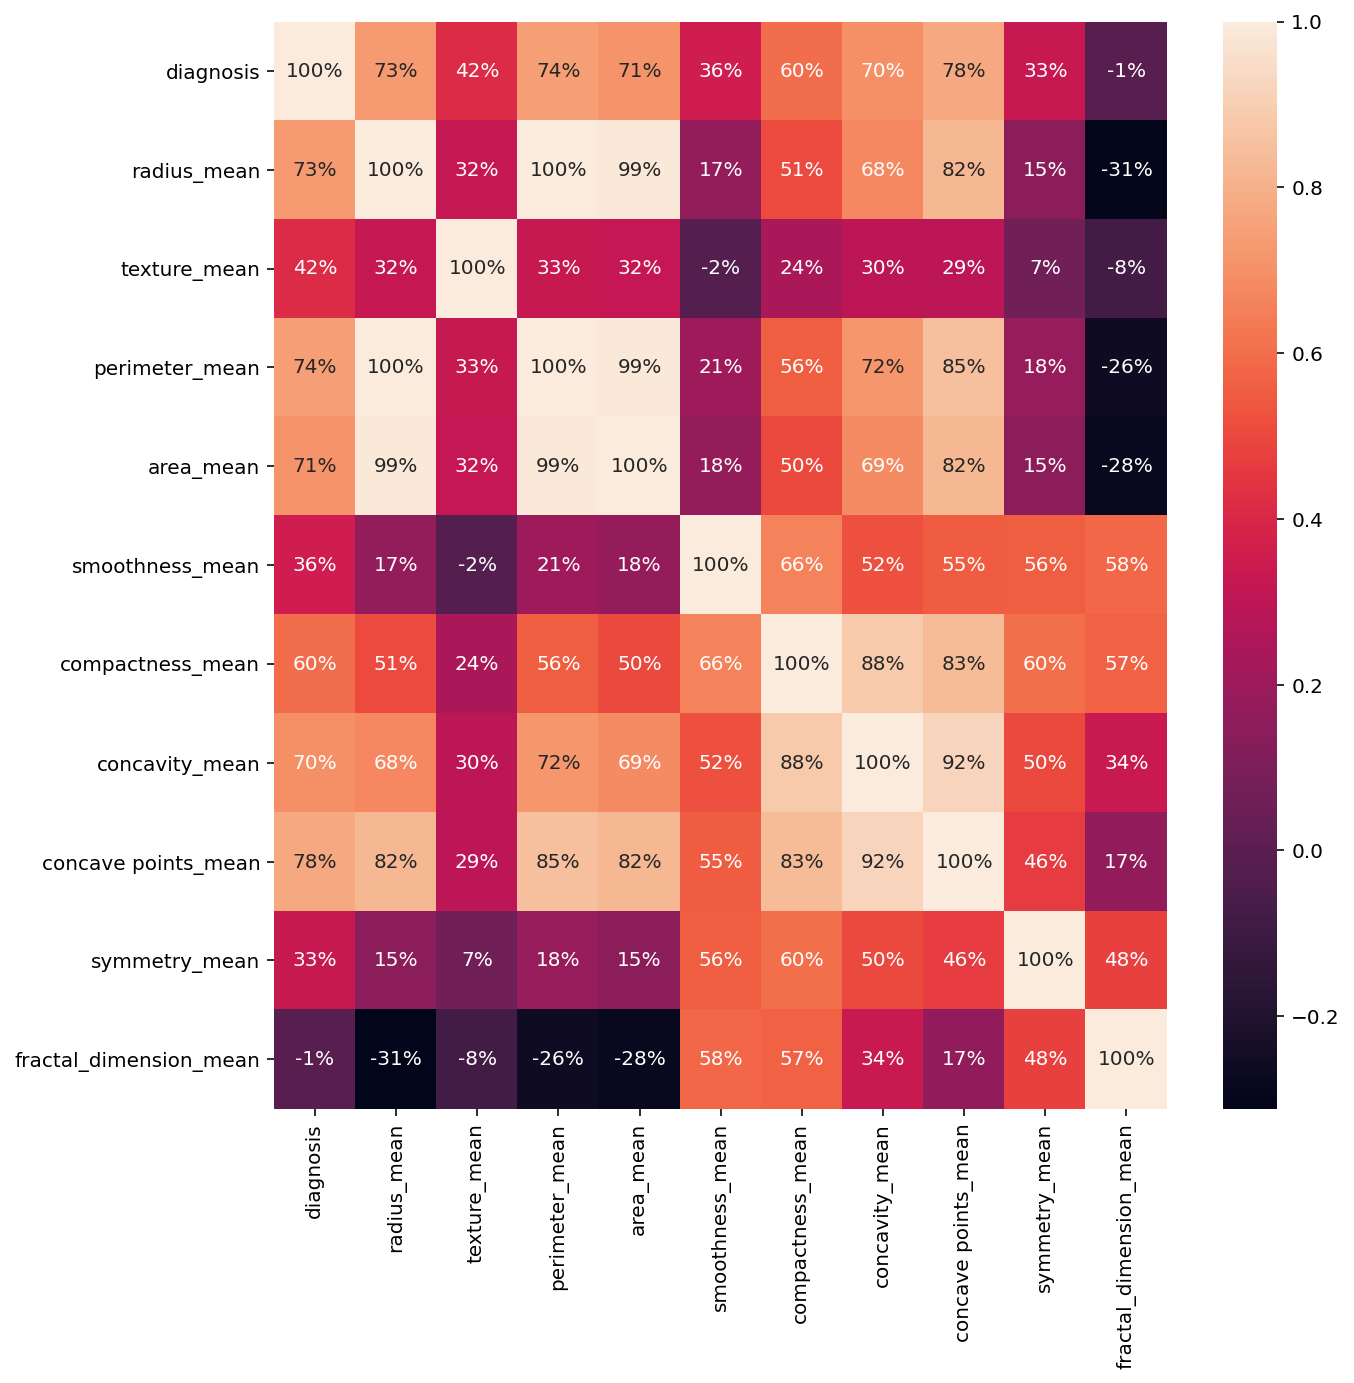

In [73]:
#Visualize the above correlation
plt.figure(figsize=(10, 10))
sns.heatmap(cancer_data.iloc[:, 0:11].corr(), annot=True, fmt='.0%')

In [74]:
#Split datasets into x and y
X = cancer_data.iloc[:,1:]
Y = cancer_data.iloc[:,0]
X.shape

(569, 30)

In [75]:
#scale input data - bring all data to similar scale
X = preprocessing.scale(X)

In [76]:
#split input into training and testing as well as output
#splitting with 85% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [87]:
#define a sequence of layers
model = Sequential()
#an arbritary amount of neurons (15), input_shape = no of features, relu performs more better than relu for hidden layers
model.add(Dense(15, input_shape=(30,), activation='relu'))
#output layer must be sigmoid cuz it needs to classify between 2 classes (0 or 1 - benign or malignant)
#we use only 1 neuron cuz it will only have one final output (1 or 0)
model.add(Dense(1, activation='sigmoid'))

#compile model - binary classification problem (2 class problem)
#adam is an on optimizer than combines both momentum and
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [88]:
#early stopping monitors the training epochs and stops the training b4 any overfitting
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

#train model for 2000 epochs
history = model.fit(X_train, y_train, epochs=2000, validation_split=0.15, verbose=1, callbacks=[earlystopper])

history_performance = history.history

Epoch 1/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4908 - accuracy: 0.7746 - val_loss: 0.4660 - val_accuracy: 0.7681
Epoch 2/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8834 - val_loss: 0.3497 - val_accuracy: 0.8696
Epoch 3/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.9093 - val_loss: 0.2818 - val_accuracy: 0.9275
Epoch 4/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9197 - val_loss: 0.2426 - val_accuracy: 0.9275
Epoch 5/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9326 - val_loss: 0.2150 - val_accuracy: 0.9275
Epoch 6/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9404 - val_loss: 0.1948 - val_accuracy: 0.9275
Epoch 7/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9456 - val_loss: 0.1810 - val_accuracy: 0.9420
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9948 - val_loss: 0.0795 - val_accuracy: 0.9855
Epoch 59/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9948 - val_loss: 0.0796 - val_accuracy: 0.9855
Epoch 60/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9948 - val_loss: 0.0793 - val_accuracy: 0.9855
Epoch 61/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9948 - val_loss: 0.0796 - val_accuracy: 0.9855
Epoch 62/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9948 - val_loss: 0.0804 - val_accuracy: 0.9855
Epoch 63/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9948 - val_loss: 0.0806 - val_accuracy: 0.9855
Epoch 64/2000
13/13 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9948 - val_loss: 0.0799 - val_accuracy: 0.9855
Epoch 65/2000

<Figure size 432x288 with 0 Axes>

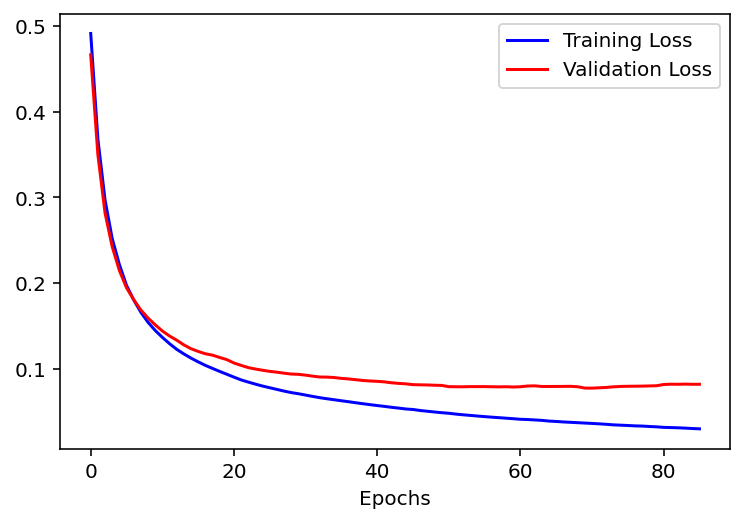

In [89]:
#Visualize loss
loss = history_performance['loss']
val_loss = history_performance['val_loss']
plt.figure()
plt.figure()
plt.xlabel("Epochs")
plt.plot(loss, 'b', label="Training Loss")
plt.plot(val_loss, 'r', label="Validation Loss")
plt.legend()

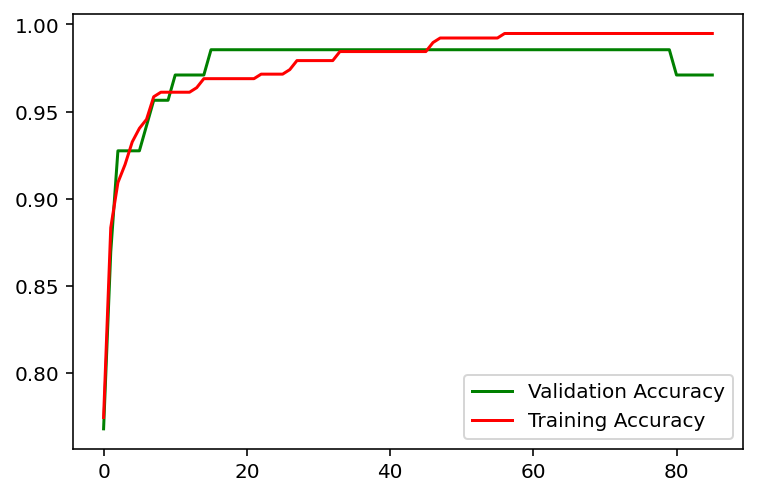

In [90]:
#Visualize Accuracy
accuracy = history_performance['accuracy']
val_accuracy = history_performance['val_accuracy']
plt.plot(val_accuracy, '-g', label="Validation Accuracy")
plt.plot(accuracy, '-r', label="Training Accuracy")
plt.legend()

In [91]:
#calculate loss and accuracy of testing data
#correct/total
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 499us/step - loss: 0.1177 - accuracy: 0.9561
Test Loss: 0.11767715960741043
Test Accuracy: 0.9561403393745422


In [92]:
#Creating the ROC curve to visualize sensitivity n specificity
from sklearn.metrics import roc_curve    #roc curve and ared under curve
from sklearn.metrics import auc

y_test_pred = model.predict(X_test)
#calculate false positives and true positives
fps, tps, thresholds = roc_curve(y_test, y_test_pred)

auc_keras = auc(fps, tps)
print("Testing data AUC", auc_keras)

Testing data AUC 0.9917434106065417


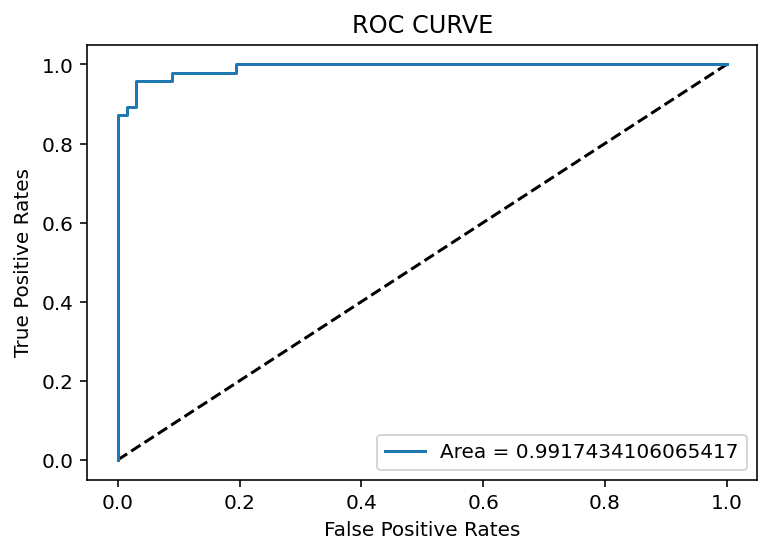

In [93]:
#plot the roc curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fps, tps, label=f'Area = {auc_keras}')
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title("ROC CURVE")
plt.legend(loc='best')
plt.show()